In [2]:
#Importing the Required Librarires

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt###
                               ### Visualisation tools
import seaborn as sns          ###

from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor , Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import os


for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Untitled1.ipynb
./.DS_Store
./Untitled.ipynb
./Untitled2.ipynb
./fraudTrain.csv
./fraudTest.csv
./.ipynb_checkpoints/Untitled2-checkpoint.ipynb
./.ipynb_checkpoints/Untitled1-checkpoint.ipynb
./.ipynb_checkpoints/Untitled-checkpoint.ipynb


In [3]:
# Concatenating dataframe 

df1_1 = pd.read_csv("fraudTrain.csv")
df1_1 = df1_1.drop(df1_1.columns[0], axis=1)

df1_2 = pd.read_csv("fraudTest.csv")
df1_2 = df1_2.drop(df1_2.columns[0], axis=1)

df = pd.concat([df1_1,df1_2])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
#dividing data into categorical and numerical
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(exclude = 'object')
le = LabelEncoder()

In [5]:
# Cleaning data set for missing values

nan_df = pd.DataFrame(data = (df.isnull().sum()/len(df))*100,columns = ['% of missing values'])

In [6]:
nan_df
#there is no null values

,% of missing values
trans_date_trans_time,0.0
cc_num,0.0
merchant,0.0
category,0.0
amt,0.0
first,0.0
last,0.0
gender,0.0
street,0.0
city,0.0


In [7]:

df['gender_le']  = le.fit_transform(df['gender'])

In [10]:
# Seperating  numerical from nominal
# cutting off some data to avoid heavy cpu usage
df2 = df.select_dtypes(exclude = 'object')


In [11]:
# Reading top records of the data
df2.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,gender_le
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,1
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,1
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,1


In [12]:
# dropping the feature which is not useful for data analysis
df2 = df2.drop(['cc_num'],axis=1)
# seperating target and independent features
x = df2.drop('is_fraud',axis=1)
y = df2['is_fraud']

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7 , random_state = 10)

In [14]:
df_num = df_num.drop(['cc_num'],axis=1)

In [15]:
df_num = df_num.drop('is_fraud',axis=1)

In [16]:
# Scaling the data
ss = StandardScaler()
xtrain[df_num.columns] = ss.fit_transform(xtrain[df_num.columns])
xtest[df_num.columns] = ss.fit_transform(xtest[df_num.columns])

In [17]:
#Building a Logistic Regression Model

lr = LogisticRegression()
model_v1 = lr.fit(xtrain,ytrain)

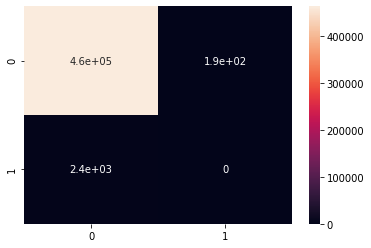

In [18]:
#  predict and confusion matrix

ypred = model_v1.predict(xtest)
cm  = confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [19]:
#classification report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    464345
           1       0.00      0.00      0.00      2371

    accuracy                           0.99    466716
   macro avg       0.50      0.50      0.50    466716
weighted avg       0.99      0.99      0.99    466716



In [20]:
#Naive Bayes model
nb =GaussianNB()
model_v3 = nb.fit(xtrain,ytrain)

<AxesSubplot:>

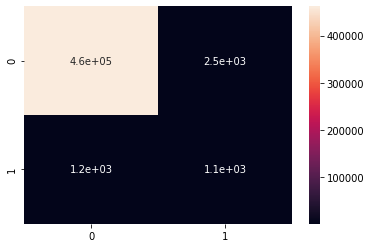

In [21]:
ypred = model_v3.predict(xtest)
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    464345
           1       0.32      0.48      0.38      2371

    accuracy                           0.99    466716
   macro avg       0.66      0.74      0.69    466716
weighted avg       0.99      0.99      0.99    466716



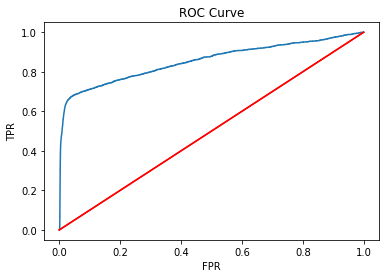

In [23]:
#### ROC curve
## Logistic Regression Model
prob = model_v1.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [27]:
#KNN model
knn = KNeighborsClassifier()
model_v2 = knn.fit(xtrain,ytrain)
ypred1 = model_v2.predict(xtest)

In [29]:
prob1 = model_v2.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob1)

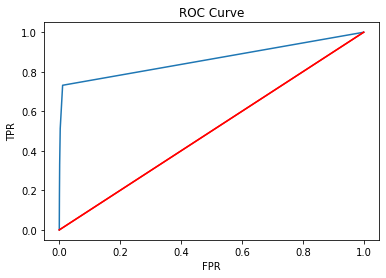

In [31]:
## KNN Classifier Model
prob1 = model_v2.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob1)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [32]:
ypred = model_v2.predict(xtest)

In [33]:
prediction = pd.DataFrame()
prediction['Serial No.'] = xtest.index
prediction['is_fraud_pred'] = ypred

In [40]:

prediction[prediction['is_fraud_pred']==1]


,Serial No.,is_fraud_pred
885,66035,1
892,805921,1
1727,454943,1
1758,574453,1
1765,890124,1
...,...,...
464119,401448,1
464412,962140,1
464487,962957,1
464895,48949,1
